In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict, Generator

from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

from fairlearn.postprocessing import ThresholdOptimizer
from fairlearn.preprocessing import CorrelationRemover
from fairlearn.reductions import EqualizedOdds
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference
from fairlearn.reductions import DemographicParity, EqualizedOdds
from fairlearn.reductions import ExponentiatedGradient

import warnings
from tqdm import tqdm
import time
import torch

from functions import *

In [2]:
base_path = './res_german/'
n_size = [100, 500, 700]

data = pd.read_csv("german.csv", sep = ";")
data['Sex'] = data['Sex_Marital_Status'].replace({1:0, 2:1, 3:0, 4:0})
data.drop(columns="Sex_Marital_Status", inplace=True)

categorical_cols = ['Account_Balance', 'Payment_Status_of_Previous_Credit', 'Purpose',
                    'Value_Savings_Stocks', 'Length_of_current_employment',
                    'Guarantors', 'Most_valuable_available_asset', 'Concurrent_Credits', 'Type_of_apartment',
                    'Occupation', 'Telephone', 'Foreign_Worker']

numerical_cols = ['Duration_of_Credit_monthly', 'Credit_Amount', 'Instalment_per_cent', 'Duration_in_Current_address',
                  'Age_years', 'No_of_Credits_at_this_Bank', 'No_of_dependents', 'Sex']

for col_name in categorical_cols:
    data[col_name] = data[col_name].astype("category")
    
Y, A = data.loc[:, "Creditability"], data.loc[:,"Sex"]
X = pd.get_dummies(data.drop(columns=["Creditability"]))

X_train, X_test, y_train, y_test, A_train, A_test = train_test_split(X, Y, A, test_size=0.3, random_state=42)

## Pre-processing method

In [ ]:
bootstrap_correlation_remover(X_train,y_train,A_train,X_test,y_test,A_test,sensitive_feature="Sex",
                              B = 100, n_size = n_size, clf = 'rf', base_path = base_path)

In [30]:
clf = 'rf'
df_pre_100_rf = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[0], clf))
df_pre_500_rf = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[1], clf))
df_pre_700_rf = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[2], clf))

print_confidence_intervals(df_pre_100_rf, df_pre_500_rf, df_pre_700_rf)

Confidence intervals for size 1
AUC: [0.58,0.72]
DP: [0.00,0.41]
EO: [0.02,0.49]

Confidence intervals for size 2
AUC: [0.72,0.79]
DP: [0.01,0.24]
EO: [0.02,0.35]

Confidence intervals for size 3
AUC: [0.73,0.79]
DP: [0.01,0.21]
EO: [0.03,0.40]


In [ ]:
bootstrap_correlation_remover(X_train,y_train,A_train,X_test,y_test,A_test,sensitive_feature="Sex",
                              B = 100, n_size = n_size, clf = 'lr', base_path = base_path)

In [9]:
clf = 'lr'
df_pre_100_lr = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[0], clf))
df_pre_500_lr = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[1], clf))
df_pre_700_lr = pd.read_csv(base_path+'pre_metrics_nsize_{}_{}'.format(n_size[2], clf))

print_confidence_intervals(df_pre_100_lr, df_pre_500_lr, df_pre_700_lr)

Confidence intervals for size 1
AUC: [0.62,0.73]
DP: [0.00,0.17]
EO: [0.02,0.26]

Confidence intervals for size 2
AUC: [0.72,0.78]
DP: [0.00,0.14]
EO: [0.01,0.21]

Confidence intervals for size 3
AUC: [0.73,0.79]
DP: [0.00,0.14]
EO: [0.01,0.21]


## In-processing method

In [ ]:
bootstrap_exp_gradient(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'demographic_parity',
                       B = 100, n_size = n_size,clf = 'rf',base_path=base_path)

In [33]:
clf = 'rf'
df_in_100_dp_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[0], 'demographic_parity', clf))
df_in_500_dp_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[1], 'demographic_parity', clf))
df_in_700_dp_rf  = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[2], 'demographic_parity', clf))

print_confidence_intervals(df_in_100_dp_rf, df_in_500_dp_rf, df_in_700_dp_rf)

Confidence intervals for size 1
AUC: [0.52,0.63]
DP: [0.00,0.11]
EO: [0.01,0.19]

Confidence intervals for size 2
AUC: [0.60,0.70]
DP: [0.02,0.18]
EO: [0.04,0.26]

Confidence intervals for size 3
AUC: [0.62,0.71]
DP: [0.01,0.14]
EO: [0.02,0.26]


In [ ]:
bootstrap_exp_gradient(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'equalized_odds',
                       B = 100, n_size = n_size,clf = 'rf',base_path=base_path)

In [3]:
clf = 'rf'
df_in_100_eo_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[0], 'equalized_odds', clf))
df_in_500_eo_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[1], 'equalized_odds', clf))
df_in_700_eo_rf = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[2], 'equalized_odds', clf))

print_confidence_intervals(df_in_100_eo_rf, df_in_500_eo_rf, df_in_700_eo_rf)

Confidence intervals for size 1
AUC: [0.50,0.56]
DP: [0.00,0.07]
EO: [0.00,0.10]

Confidence intervals for size 2
AUC: [0.60,0.69]
DP: [0.01,0.16]
EO: [0.02,0.28]

Confidence intervals for size 3
AUC: [0.61,0.70]
DP: [0.01,0.18]
EO: [0.02,0.33]


In [ ]:
bootstrap_exp_gradient(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'demographic_parity',
                       B = 100, n_size = n_size,clf = 'lr',base_path=base_path)

In [3]:
clf = 'lr'
df_in_100_dp_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[0], 'demographic_parity', clf))
df_in_500_dp_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[1], 'demographic_parity', clf))
df_in_700_dp_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[2], 'demographic_parity', clf))

print_confidence_intervals(df_in_100_dp_lr, df_in_500_dp_lr, df_in_700_dp_lr)

Confidence intervals for size 1
AUC: [0.57,0.68]
DP: [0.01,0.34]
EO: [0.03,0.38]

Confidence intervals for size 2
AUC: [0.64,0.71]
DP: [0.00,0.18]
EO: [0.02,0.28]

Confidence intervals for size 3
AUC: [0.64,0.72]
DP: [0.00,0.16]
EO: [0.02,0.26]


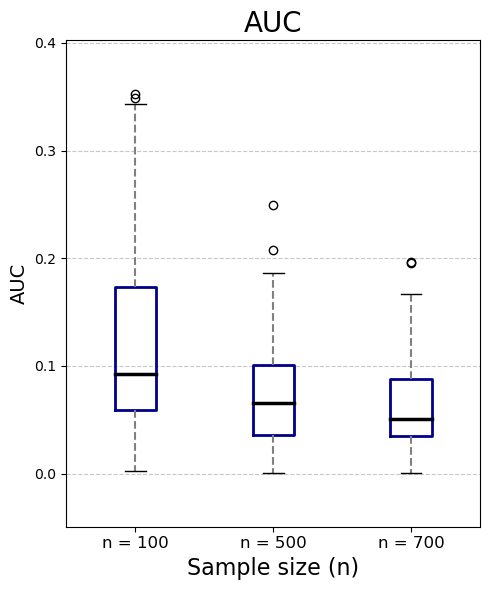

In [4]:
metrics_mitigated_in_auc_lr = [df_in_100_dp_lr.dp, df_in_500_dp_lr.dp, df_in_700_dp_lr.dp]
generate_boxplots(metrics_mitigated_in_auc_lr, 
                  n_size=  n_size,
                  metric = 'AUC', 
                  method = 'exponentiated gradient',
                  file_path = './fig_final/german_in_boxplot_auc_lr.png',
                  dataset='German',
                  clf = 'lr')

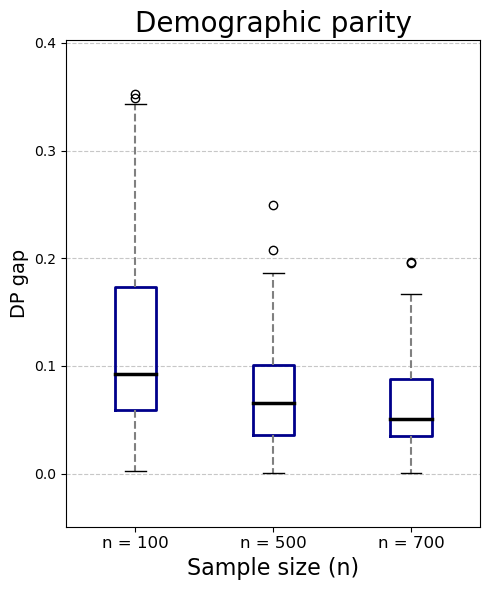

In [6]:
metrics_mitigated_in_dp_lr = [df_in_100_dp_lr.dp, df_in_500_dp_lr.dp, df_in_700_dp_lr.dp]
generate_boxplots(metrics_mitigated_in_dp_lr, 
                  n_size=  n_size,
                  metric = 'Demographic parity', 
                  method = 'exponentiated gradient',
                  file_path = './fig_final/german_in_boxplot_dp_lr.png',
                  dataset='German',
                  clf = 'lr')

In [ ]:
bootstrap_exp_gradient(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'equalized_odds',
                       B = 100, n_size = n_size,clf = 'lr',base_path=base_path)

In [7]:
clf = 'lr'
df_in_100_eo_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[0], 'equalized_odds', clf))
df_in_500_eo_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[1], 'equalized_odds', clf))
df_in_700_eo_lr = pd.read_csv(base_path+'in_metrics_nsize_{}_{}_{}'.format(n_size[2], 'equalized_odds', clf))

print_confidence_intervals(df_in_100_eo_lr, df_in_500_eo_lr, df_in_700_eo_lr)

Confidence intervals for size 1
AUC: [0.56,0.69]
DP: [0.00,0.25]
EO: [0.02,0.32]

Confidence intervals for size 2
AUC: [0.65,0.74]
DP: [0.01,0.19]
EO: [0.02,0.31]

Confidence intervals for size 3
AUC: [0.64,0.74]
DP: [0.00,0.20]
EO: [0.02,0.34]


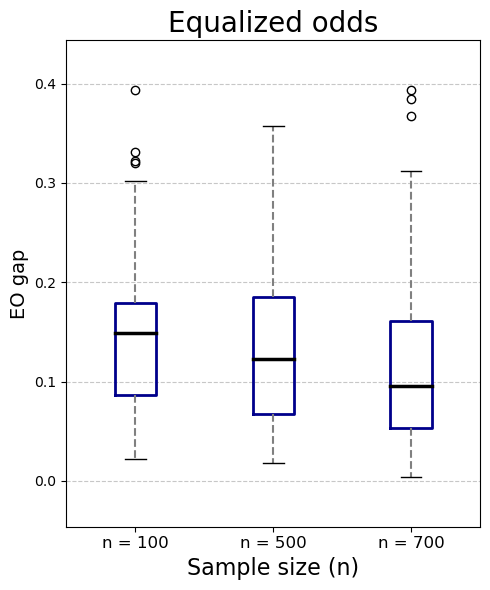

In [8]:
metrics_mitigated_in_eo_lr = [df_in_100_eo_lr.eo, df_in_500_eo_lr.eo, df_in_700_eo_lr.eo]
generate_boxplots(metrics_mitigated_in_eo_lr, 
                  n_size=  n_size,
                  metric = 'Equalized odds', 
                  method = 'exponentiated gradient',
                  file_path = './fig_final/german_in_boxplot_eo_lr.png',
                  dataset='German',
                  clf = 'lr')

## Post-processing method

In [ ]:
bootstrap_threshold_optimizer(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'demographic_parity',
                              B = 100, n_size = n_size, clf = 'rf', base_path=base_path)

In [11]:
clf = 'rf'
df_post_100_dp = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[0], 'demographic_parity', clf))
df_post_500_dp = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[1], 'demographic_parity', clf))
df_post_700_dp = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[2], 'demographic_parity', clf))

print_confidence_intervals(df_post_100_dp, df_post_500_dp, df_post_700_dp)

Confidence intervals for size 1
AUC: [0.48,0.63]
DP: [0.03,0.71]
EO: [0.06,0.74]

Confidence intervals for size 2
AUC: [0.53,0.72]
DP: [0.01,0.60]
EO: [0.04,0.61]

Confidence intervals for size 3
AUC: [0.52,0.72]
DP: [0.02,0.32]
EO: [0.06,0.56]


In [ ]:
bootstrap_threshold_optimizer(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'equalized_odds',
                              B = 100, n_size = n_size, clf = 'rf', base_path=base_path)

In [17]:
clf = 'rf'
df_post_100_eo = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[0], 'equalized_odds',clf))
df_post_500_eo = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[1], 'equalized_odds', clf))
df_post_700_eo = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[2], 'equalized_odds', clf))

print_confidence_intervals(df_post_100_eo, df_post_500_eo, df_post_700_eo)

Confidence intervals for size 1
AUC: [0.56,0.69]
DP: [0.09,0.60]
EO: [0.19,0.78]

Confidence intervals for size 2
AUC: [0.62,0.69]
DP: [0.10,0.44]
EO: [0.15,0.49]

Confidence intervals for size 3
AUC: [0.62,0.70]
DP: [0.11,0.42]
EO: [0.16,0.53]


In [ ]:
bootstrap_threshold_optimizer(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'demographic_parity',
                              B = 100, n_size = n_size, clf = 'lr', base_path=base_path)

In [23]:
clf = 'lr'
df_post_100_dp_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[0], 'demographic_parity', clf))
df_post_500_dp_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[1], 'demographic_parity', clf))
df_post_700_dp_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[2], 'demographic_parity', clf))

print_confidence_intervals(df_post_100_dp_lr, df_post_500_dp_lr, df_post_700_dp_lr)

Confidence intervals for size 1
AUC: [0.57,0.69]
DP: [0.00,0.34]
EO: [0.02,0.33]

Confidence intervals for size 2
AUC: [0.65,0.74]
DP: [0.01,0.22]
EO: [0.04,0.25]

Confidence intervals for size 3
AUC: [0.68,0.75]
DP: [0.00,0.14]
EO: [0.02,0.23]


In [ ]:
bootstrap_threshold_optimizer(X_train,y_train,A_train,X_test,y_test,A_test,fair_constraint = 'equalized_odds',
                              B = 100, n_size = n_size, clf = 'lr', base_path=base_path)

In [25]:
clf = 'lr'
df_post_100_eo_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[0], 'equalized_odds', clf))
df_post_500_eo_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[1], 'equalized_odds', clf))
df_post_700_eo_lr = pd.read_csv(base_path+'post_metrics_nsize_{}_{}_{}'.format(n_size[2], 'equalized_odds', clf))

print_confidence_intervals(df_post_100_eo_lr, df_post_500_eo_lr, df_post_700_eo_lr)

Confidence intervals for size 1
AUC: [0.59,0.70]
DP: [0.01,0.38]
EO: [0.05,0.40]

Confidence intervals for size 2
AUC: [0.64,0.75]
DP: [0.01,0.20]
EO: [0.04,0.33]

Confidence intervals for size 3
AUC: [0.67,0.76]
DP: [0.01,0.19]
EO: [0.03,0.25]
